In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('~/Downloads/Online Payment Fraud Detection Dataset.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# About Dataset

Column References: 

0. step: represents a unit of time where 1 step equals 1 hour
1. type: type of online transaction
2. amount: the amount of the transaction
3. nameOrig: customer starting the transaction
4. oldbalanceOrg: balance before the transaction
5. newbalanceOrig: balance after the transaction
6. nameDest: recipient of the transaction
7. oldbalanceDest: initial balance of recipient before the transaction
8. newbalanceDest: the new balance of recipient after the transaction
9. isFraud: fraud transaction
10. isFlaggedFraud: fraud transaction flagged

In [5]:
#To find if any data is missing on each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print(f'updated shape :{df.shape}')

updated shape :(6362620, 11)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


# To find if there are any null values on each column, before performing analysis

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [14]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pydantic==2.7.0 ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [17]:
# from pydantic import BaseSettings # OLD
from pydantic_settings import BaseSettings # NEW

In [18]:
from ydata_profiling import ProfileReport

In [19]:
profile = ProfileReport(df, title = "Online Payment Fraud Detection Exploratory Data Analysis")

In [20]:
dir(profile)

['_ProfileReport__initialize_dataframe',
 '_ProfileReport__validate_inputs',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_description_set',
 '_df_hash',
 '_html',
 '_json',
 '_render_html',
 '_render_json',
 '_render_widgets',
 '_report',
 '_repr_html_',
 '_sample',
 '_summarizer',
 '_type_schema',
 '_typeset',
 '_widgets',
 'compare',
 'config',
 'description_set',
 'df',
 'df_hash',
 'dump',
 'dumps',
 'get_description',
 'get_duplicates',
 'get_rejected_variables',
 'get_sample',
 'html',
 'invalidate_cache',
 'json',
 'load',
 'loads',
 'report',
 'summarizer',
 'to_expectation_suite',
 'to_file',
 'to_html',
 'to_json',
 'to_notebook_ifram

In [21]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


In [22]:
config = {"plot": {"font_path": "/Library/Fonts/Keyboard.ttf"}}

In [23]:
profile = ProfileReport(df)

In [24]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

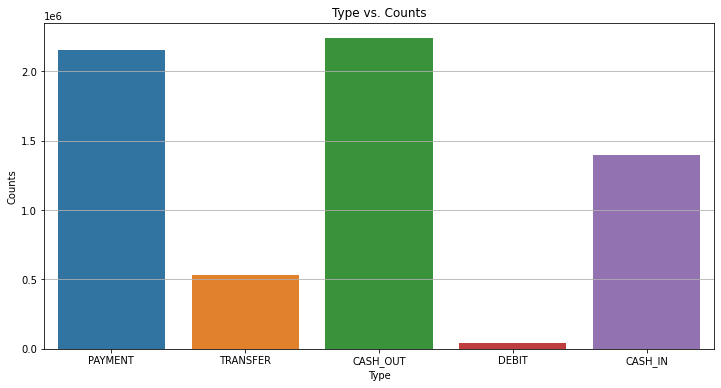

In [25]:
plt.figure(figsize=(12,6))
plt.title("Type vs. Counts")
sns.countplot(data=df, x='type')
plt.xlabel("Type")
plt.ylabel("Counts")
plt.grid(axis='y', alpha=1)
plt.show()

# Explore the correlation between type vs. isFraud. Convert the `type` column to numerical values using one-hot encoding

In [26]:
df['type_encoded'] = df['type'].astype('category').cat.codes

# Calculate the correlation matrix

In [27]:
correlation_matrix = df[['type_encoded', 'isFraud']].corr()

# Display the correlation between type_encoded and isFraud

In [28]:
print("Correlation between transaction type and fraud:")
print(correlation_matrix)

Correlation between transaction type and fraud:
              type_encoded   isFraud
type_encoded      1.000000  0.020833
isFraud           0.020833  1.000000


# Calculates the average value of isFraud (which represents the fraud rate) for each transaction type. A higher mean indicates a higher likelihood of fraud.

In [29]:
fraud_rate_by_type = df.groupby('type')['isFraud'].mean()

# Display fraud rates for each transaction type

In [30]:
print("Fraud rate by transaction type:")
print(fraud_rate_by_type)

Fraud rate by transaction type:
type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64


# Visualize the fraud rate by type

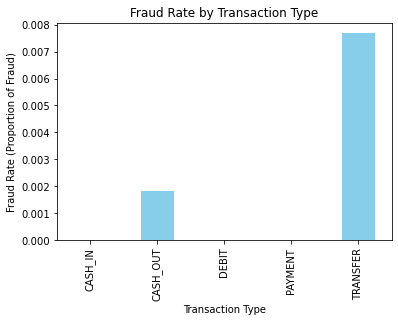

In [31]:
fraud_rate_by_type.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate (Proportion of Fraud)')
plt.xlabel('Transaction Type')
plt.show()

# Out of the five different types of transactions, TRANSFER has the highest fraud rate, and CASH_OUT is the second highest. The other three types have zero incidents of fraud. 

# Dropping features that are not relevant for modeling since these are only account numbers:

In [32]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Based on the correlation in the heatmap, 'step' can be dropped

In [33]:
df.drop(['step'], axis=1, inplace=True)

In [34]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_encoded'],
      dtype='object')

## Dropped 'type' since this is categorial feature and I already create another column 'type_encoded' using one-hot encoder

In [35]:
df.drop(['type'], axis=1, inplace=True)

# Drop the label column 'y' and maintain all other columns

In [36]:
X = df.drop(columns='isFraud')
y = df['isFraud']

In [37]:
df

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  type_encoded  
0                  0.00        0               0             3  
1                  0.00        0               0             3  
2                  0.00        1               0             4  
3                  0.00        1               0             1  
4                  0.00        0               0             3  
...                 ...      ...             ...           ...  
6362615       339682.13        1               0             1  
6362616            0.00        1               0             4  
6362617      6379898.11        1               0             1  
6362618            0.00        1               0             4  
6362619      7360101.63        1               0             1  

[6362620 rows x 8 columns]

# Apply SMOTE to balance the target variable

In [38]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE


In [40]:
over_sample = SMOTE(random_state=0)

In [41]:
X, y = over_sample.fit_resample(X, y)

In [42]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

## Feature Engineering and Train/Test Split

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define column transformer for handling different types of encodings
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['type_encoded']), 
                                     remainder = StandardScaler())

In [44]:
from sklearn.model_selection import train_test_split
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
from sklearn.pipeline import Pipeline
# Create a pipeline with the transformer and and the classifier 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logregressionpipe = Pipeline([
    ('transform', transformer),
    ('classifier', LogisticRegression(max_iter=1000))
])
logregressionpipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['type_encoded'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

# Model Evaluations

In [46]:
y_pred = logregressionpipe.predict(X_test)

In [47]:
confusion_matrix(y_test,y_pred)


array([[1214110,   56727],
       [  27572, 1243354]])

In [48]:
#Calculate and print the training accuracy
logregressionpipe_acc_train = logregressionpipe.score(X_train, y_train)
logregressionpipe_acc_test = logregressionpipe.score(X_test, y_test)

In [49]:
print(f"Training Accuracy: {logregressionpipe_acc_train:.4f}")
print(f"Testing Accuracy: {logregressionpipe_acc_test:.4f}")

Training Accuracy: 0.9668
Testing Accuracy: 0.9668


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1270837
           1       0.96      0.98      0.97   1270926

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763



In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

In [52]:
# Define the models to test (with baseline parameters)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

In [53]:
# Initialize a dictionary to store the accuracy results
model_performance = {}

In [54]:
# Fit and evaluate each model, and create a pipeline with the transformer and and the classifiers
for model_name, model in models.items():
    print(f"Processing model: {model_name}")
    
    pipe = Pipeline([
    ('transform', transformer),
    ('models', model)
    ])
    
    # Track the start time for training
    start_time = time.time()
    
    # Fit the pipeline
    pipe.fit(X_train, y_train)
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, pipe.predict(X_train))
    
    # Evaluate the model on the test data (test accuracy)
    test_accuracy = accuracy_score(y_test, pipe.predict(X_test))
    
    # Store the results in the dictionary
    model_performance[model_name] = {
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }
    
    # Print the results for each model after processing
    print(f"{model_name} - Train Time: {train_time:.4f} seconds, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Processing model: Logistic Regression
Logistic Regression - Train Time: 131.6393 seconds, Train Accuracy: 0.9668, Test Accuracy: 0.9668
Processing model: Decision Tree
Decision Tree - Train Time: 64.2458 seconds, Train Accuracy: 1.0000, Test Accuracy: 0.9996


In [55]:
import pandas as pd
performance_df = pd.DataFrame(model_performance).T

In [56]:
# Rename the columns to match the desired output format
performance_df.columns = ['Train Time (s)', 'Train Accuracy', 'Test Accuracy']

# Display the DataFrame
print(performance_df)

                     Train Time (s)  Train Accuracy  Test Accuracy
Logistic Regression      131.639325        0.966763       0.966834
Decision Tree             64.245752        1.000000       0.999642


# Implement XGBoost (separately) for credit card fraudulent detections

In [57]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
!pip install xgboost

In [59]:
import xgboost as xgb

In [60]:
from xgboost import XGBClassifier

In [61]:
# SMOTE already applied to oversample the minority class, so next step is to calculate the scale_pos_weight value
fraud_ratio = y.value_counts()[0] / y.value_counts()[1]

In [62]:
model = XGBClassifier(scale_pos_weight=fraud_ratio, random_state=42)

In [63]:
# Calculate the scale_pos_weight value
fraud_ratio = y.value_counts()[0] / y.value_counts()[1]

In [64]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<Figure size 720x576 with 0 Axes>

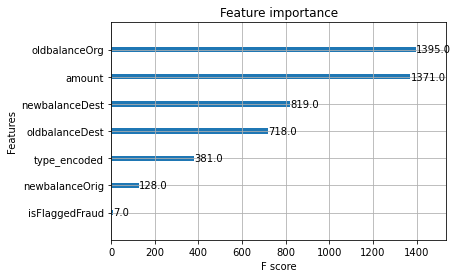

In [65]:
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(model)
plt.show()

In [66]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [67]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



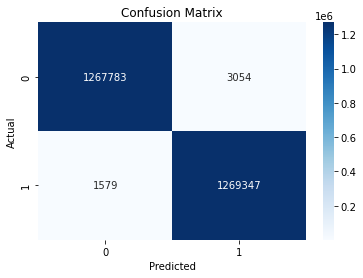

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# ROC-AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {auc:.4f}')

ROC-AUC Score: 0.9999


In [70]:
from sklearn.metrics import roc_curve

# Plot ROC Curve

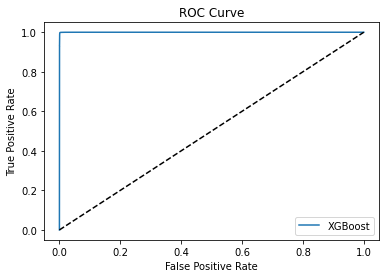

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [72]:
param_grid = {
    'max_depth': [3, 7],
    'learning_rate': [0.1],
    'n_estimators': [100],
    'subsample': [1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1]
}

In [73]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=fraud_ratio, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    n_jobs=-1,
    verbose=2
)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [75]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC Score: {grid_search.best_score_:.4f}')

Best parameters: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Best ROC-AUC Score: 0.9999
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time= 2.7min
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time= 1.3min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time= 2.8min
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time= 1.2min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time= 2.8min
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time= 1.8min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time

## Based on the result, both Logistic Regression and Decision Trees models performed well with very close test accuracy. Decision Tree yield slightly better accuracy, thus with a shorter training time which is a main factor of how efficient a model could run. 

## I also implemented XGBoost which performed well and yield high-performance models capable of identifying fraudulent transactions effectively. By properly handling class imbalance and tuning model parameters, the predictions can further improve the model's ability to detect fraud while minimizing false positives.

## Not SVM because the computer crashed. I was recommended to give a try on Neural Network but somehow have difficulties importing tensorflow so I chose the three models above to complete this project. 